In [2]:
!pip install opencv-python matplotlib

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 991.0 kB/s eta 0:00:40
   ---------------------------------------- 0.1/38.8 MB 787.7 kB/s eta 0:00:50
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.1/38.8 MB 1.1 MB/s eta 0:00:37
   ---------------------------------------- 0.2/38.8 MB 888.4 kB/s eta 0:00:44
   ---------------------------------------- 0.2/38.8 MB 901.1 kB/s eta 0:00:43
   ---------------------------------------- 0.2/38.8 MB 901.1 kB/s eta 0:00:43
   ---------------------------------------- 0.3/38.8 MB 936.6 kB/s eta 0:00:42
   ---------------------------------------- 0.3/38.8 MB 936.6 kB/s eta 0:00:42
   ---------------------------------------- 0.4/38.8 MB 859.0 kB/s eta 0:00:45
   ---------------------------------------- 0.4/38.8 MB 859.0 kB/s eta 0:00:45
   ---------------------------------------- 0.5/38.8 MB 855.0 kB/

In [10]:
import tensorflow as tf
import os

In [4]:
# To avoid exponential memory use and avoid OOM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True)

### Remove dodgy images

In [8]:
import cv2
import imghdr
from matplotlib import pyplot as plt

C:\Users\Pratham Dhiman\AppData\Local\Temp\ipykernel_8368\3427753027.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data'

In [6]:
image_exts = ['jpeg' , 'jpg' , 'bmp' , 'png']

In [11]:
img = cv2.imread(os.path.join('data' , 'happy', '25115.jpg'))
img.shape

(630, 1200, 3)

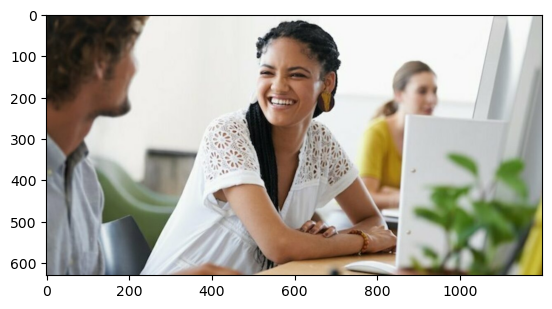

In [9]:
# plt.imshow(img)
plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir , image_class , image)
        try:
            imag = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

### Load data

In [11]:
tf.data.Dataset??

In [12]:
import numpy as np

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')
# builds classes and pre-processes the data(resize,batching ,etc...)

Found 173 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()
batch
# batch is a 2 size tuple
# batch[0] is the data after pre-processing and data[1] represents their initial labels

(array([[[[ 85.       ,  98.       ,  89.       ],
          [ 85.       ,  98.       ,  89.       ],
          [ 86.       ,  99.       ,  90.       ],
          ...,
          [197.       , 196.       , 192.       ],
          [197.       , 196.       , 192.       ],
          [197.       , 196.       , 192.       ]],
 
         [[ 85.       ,  98.       ,  89.       ],
          [ 85.       ,  98.       ,  89.       ],
          [ 86.       ,  99.       ,  90.       ],
          ...,
          [197.       , 196.       , 192.       ],
          [197.       , 196.       , 192.       ],
          [197.       , 196.       , 192.       ]],
 
         [[ 86.       ,  99.       ,  90.       ],
          [ 86.       ,  99.       ,  90.       ],
          [ 86.       ,  99.       ,  90.       ],
          ...,
          [197.       , 196.       , 192.       ],
          [195.       , 194.       , 190.       ],
          [195.       , 194.       , 190.       ]],
 
         ...,
 
         [[ 

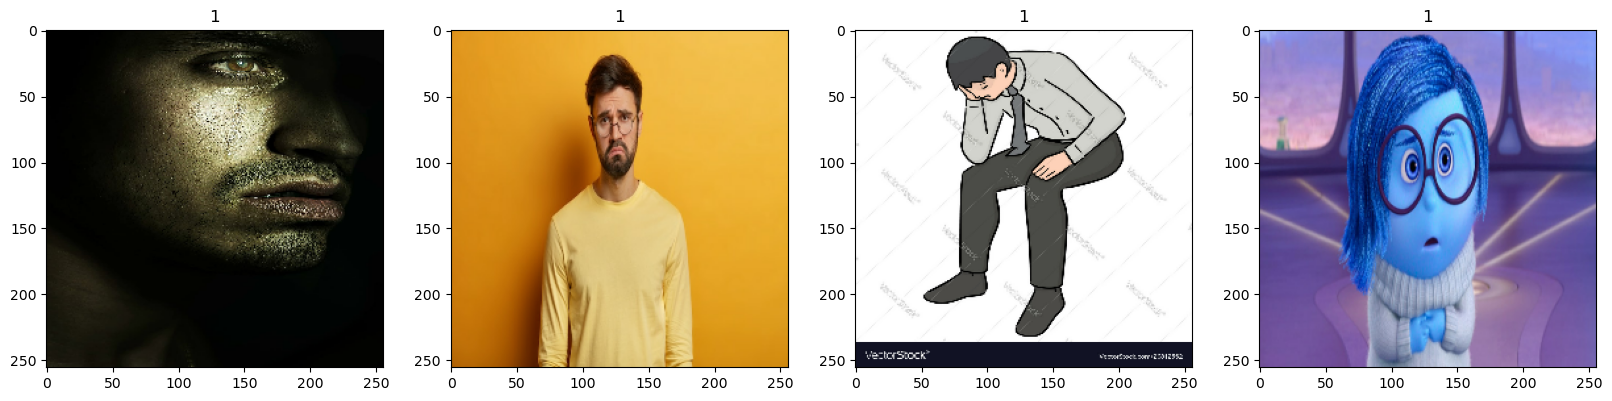

In [17]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
# class 1 = SAD PPL
# class 0 = HAPPY PPL

## Preprocess data

#### Scale data

In [19]:
# data
data = data.map(lambda x,y : (x/255 , y))

In [16]:
scaled_iterator = data.as_numpy_iterator()

In [18]:
batch = scaled_iterator.next()

In [19]:
batch[0].shape

(32, 256, 256, 3)

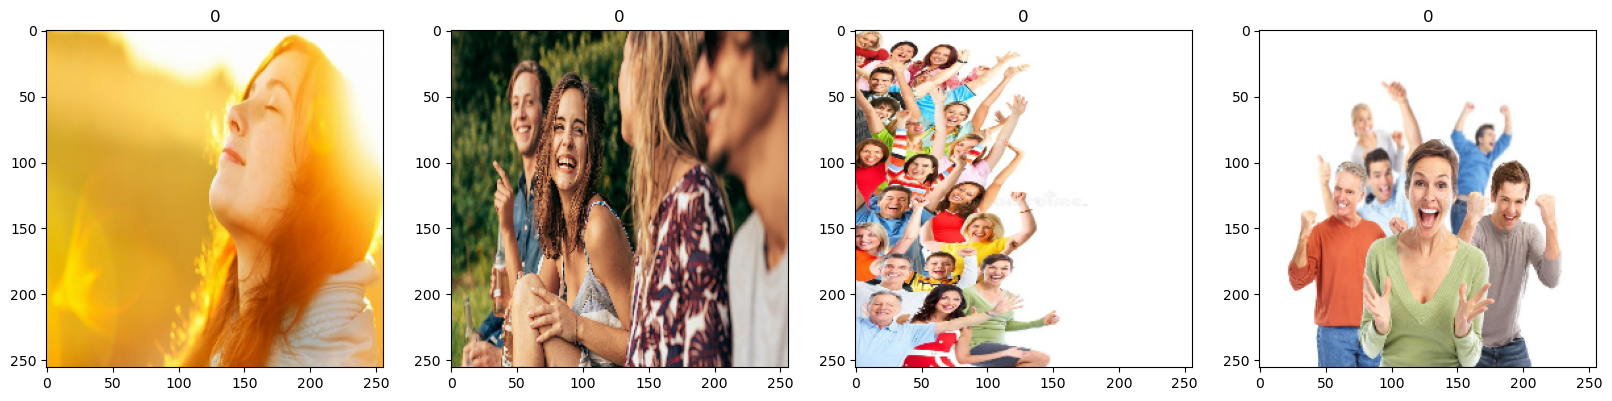

In [80]:
fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split Data

In [35]:
len(data)

6

In [81]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1
print(train_size)
print(val_size)
print(test_size)

4
1
1


In [82]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [83]:
len(train)

4

### Build Model

#### Build model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [85]:
model = Sequential()

In [86]:
model.add(Conv2D(16 , (3,3) , 1 , activation = 'relu' , input_shape= (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3) , 1 , activation = 'relu'))
model.add(MaxPooling2D())
          
model.add(Flatten())
          
model.add(Dense(256 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))          

In [87]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [88]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

#### Train

In [89]:
logdir = 'logs'

In [90]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [91]:
hist = model.fit(train , epochs = 20 , validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 743ms/step - accuracy: 0.6219 - loss: 2.1008 - val_accuracy: 0.3438 - val_loss: 1.5106
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.4448 - loss: 1.1480 - val_accuracy: 0.6562 - val_loss: 0.6415
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.5927 - loss: 0.6440 - val_accuracy: 0.5625 - val_loss: 0.6661
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 672ms/step - accuracy: 0.6448 - loss: 0.6364 - val_accuracy: 0.7500 - val_loss: 0.6124
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 683ms/step - accuracy: 0.7635 - loss: 0.6023 - val_accuracy: 0.8438 - val_loss: 0.4688
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step - accuracy: 0.7260 - loss: 0.5707 - val_accuracy: 0.7500 - val_loss: 0.5266
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 675ms/step - accuracy: 0.7437 - loss: 0.5203 - val_accuracy: 0.7500 - val_loss: 0.4756
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 750ms/step - accuracy: 0.8062 - loss: 0.4492 - val_accuracy: 0.8438 - val_loss:

In [92]:
hist.history

{'accuracy': [0.6015625,
  0.5,
  0.578125,
  0.671875,
  0.7734375,
  0.7265625,
  0.78125,
  0.8125,
  0.828125,
  0.8984375,
  0.90625,
  0.8828125,
  0.953125,
  0.9453125,
  0.9609375,
  0.96875,
  0.9765625,
  0.9765625,
  0.984375,
  0.9765625],
 'loss': [2.1623291969299316,
  0.9734994173049927,
  0.6408103704452515,
  0.6365792751312256,
  0.5929628610610962,
  0.5738058686256409,
  0.49040651321411133,
  0.43776336312294006,
  0.3963804244995117,
  0.3558539152145386,
  0.3169648349285126,
  0.34278997778892517,
  0.21456211805343628,
  0.18715018033981323,
  0.17010274529457092,
  0.13105106353759766,
  0.0938907191157341,
  0.07868772000074387,
  0.06696085631847382,
  0.07136541604995728],
 'val_accuracy': [0.34375,
  0.65625,
  0.5625,
  0.75,
  0.84375,
  0.75,
  0.75,
  0.84375,
  0.84375,
  0.90625,
  0.9375,
  0.9375,
  0.96875,
  0.9375,
  1.0,
  0.96875,
  0.9375,
  1.0,
  0.96875,
  1.0],
 'val_loss': [1.5105680227279663,
  0.6414742469787598,
  0.6661428809165955,

#### Plot Performance

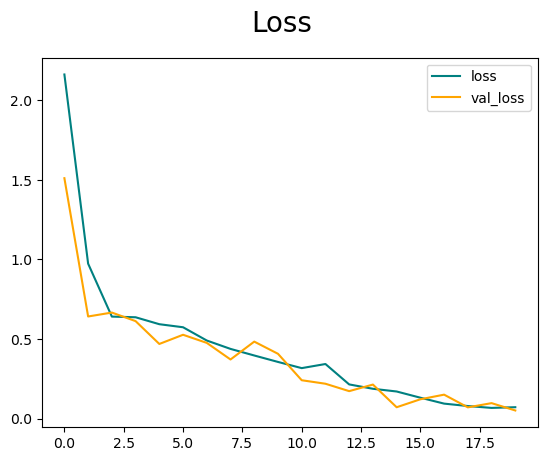

In [93]:
# fig = plt.subplots()

fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal' , label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange' , label = 'val_loss')

fig.suptitle('Loss' , fontsize = 20)
plt.legend()
plt.show()

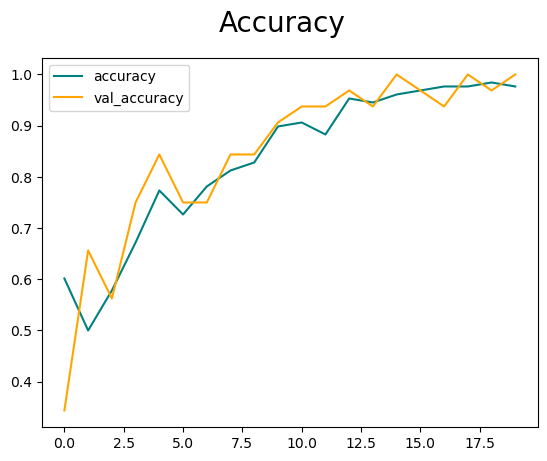

In [94]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color = 'teal' , label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , color = 'orange' , label = 'val_accuracy')
fig.suptitle('Accuracy' , fontsize = 20)
plt.legend()
plt.show()

## Evaluate Performance

#### Evaluate

In [96]:
from tensorflow.keras.metrics import Precision, Recall , BinaryAccuracy

In [97]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [98]:
for batch in test:
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)    
    acc.update_state(y,yhat)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step


In [114]:
print("Precision : " , pre.result().numpy() , "Recall : ", re.result().numpy() , "Accuracy : " , acc.result().numpy() )

Precision :  1.0 Recall :  1.0 Accuracy :  1.0


#### Test

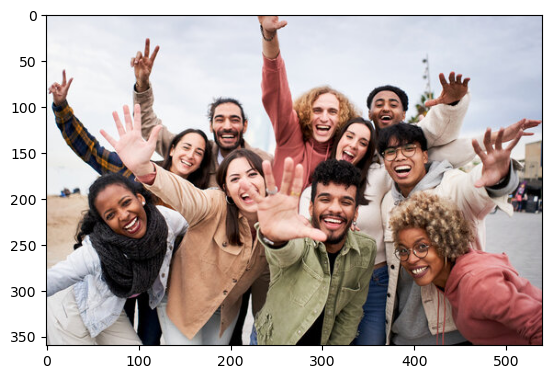

In [4]:
import cv2
img = cv2.imread('happy1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

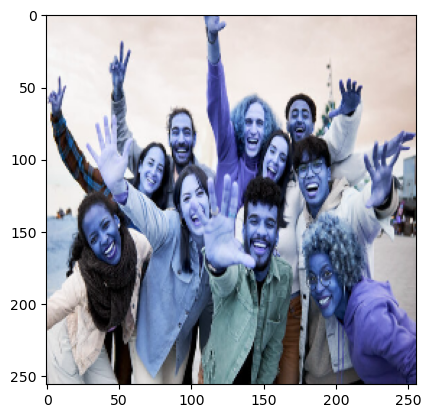

In [7]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [9]:
import numpy as np
np.expand_dims(resize/255 , 0).max()

1.0

In [10]:
yhat = model.predict(np.expand_dims(resize/255 , 0))

NameError: name 'model' is not defined

In [147]:
if yhat > 0.5:
    print("Predicted class is sad")
else:
    print("Predicted class is happy")
    

Predicted class is sad


### Save Model

In [11]:
from tensorflow.keras.models import load_model

In [12]:
model.save(os.path.join('models','happysadModel.h5'))

NameError: name 'model' is not defined

In [13]:
new_model = load_model(os.path.join('models','happysadModel.h5'))

In [14]:
yhat_new = new_model.predict(np.expand_dims(resize/255 , 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


In [15]:
if yhat_new > 0.5:
    print("Predicted class is sad")
else:
    print("Predicted class is happy")
    

Predicted class is happy
